# Word2Vec from Scratch
(by Tevfik Aytekin)

In [34]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import gutenberg, brown
import gensim 
import gensim.downloader
from gensim.models import Word2Vec 
from gensim.parsing.preprocessing import remove_stopwords
from  gensim.utils import simple_preprocess
from nltk.tokenize import RegexpTokenizer
import numpy as np
from sklearn.utils import shuffle
from queue import PriorityQueue
from tqdm import tqdm



# You need to call nltk.download() to download all the nltk corpora

## Definition from Wikipedia:

“Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.”

In [3]:
nltk.download('brown')
num_sents = len(brown.sents())
print("number of sentences:", num_sents)

[nltk_data] Downloading package brown to
[nltk_data]     /Users/tevfikaytekin/nltk_data...
[nltk_data]   Package brown is already up-to-date!


number of sentences: 57340


An example sentence represented as a list of words

In [97]:
len(brown.sents())

57340

Following is an example application of word2vec using Gensim library. You can see some of the parameters and can find all the details of Gensim implementation [here](https://radimrehurek.com/gensim/models/word2vec.html). The Gensim word2vec source code is [here](https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/word2vec.py) and the original source code by Mikolov can be found [here](https://github.com/tmikolov/word2vec/blob/master/word2vec.c).



In [100]:
model = gensim.models.Word2Vec(brown.sents(),min_count = 5,
                              vector_size = 2, window = 5, negative=5) 

An example vector representation of the word "book". Since we set size = 30, the representation is an array of 30 reals.

In [101]:
model.wv['book']

array([-1.0006769,  2.479201 ], dtype=float32)

One way to test the performance of word2vec is to look at most similar words to a given word. Below you will find most similar words of the words "book" and "eight"

In [102]:
model.wv.most_similar(positive='book')

[('politics', 1.0),
 ('canons', 1.0),
 ('allocation', 1.0),
 ('tent', 1.0),
 ('King', 1.0),
 ('draw', 1.0),
 ('diagrams', 1.0),
 ('Local', 1.0),
 ('Dutch', 1.0),
 ('packed', 0.9999999403953552)]

In [56]:
model.wv.most_similar(positive='eight')

[('seven', 0.9646596312522888),
 ('caves', 0.9394497275352478),
 ('thirty', 0.9381858110427856),
 ('decades', 0.9377256631851196),
 ('fifteen', 0.9360403418540955),
 ('fifty', 0.9339092373847961),
 ('65', 0.9307170510292053),
 ('nine', 0.9290759563446045),
 ('eleven', 0.9285792112350464),
 ('40', 0.9269148111343384)]

As you can see the results are quite amazing. But it might not be so for every word, for example for the word "angry" the results are not very satisying. However, if we have used a larger text the results could be better.

In [57]:
model.wv.most_similar(positive='on')

[('through', 0.8319888710975647),
 ('into', 0.8266659379005432),
 ('against', 0.7995290160179138),
 ('from', 0.7955067157745361),
 ('toward', 0.7870780229568481),
 ('over', 0.7822248339653015),
 ('along', 0.7820015549659729),
 ('behind', 0.7794826626777649),
 ('across', 0.7587751150131226),
 ('near', 0.743152916431427)]

In [96]:
model.wv.most_similar(positive='angry')

[('businessman', 0.9537347555160522),
 ('minister', 0.9531205892562866),
 ('ankle', 0.9490405321121216),
 ('oysters', 0.948943018913269),
 ('suffering', 0.9478389620780945),
 ('gift', 0.9463774561882019),
 ('nickname', 0.9450681209564209),
 ('master', 0.9424644708633423),
 ('thoroughly', 0.9404751658439636),
 ('occasional', 0.9392510652542114)]

You can also find (cosine) similarity between two words.

In [98]:
print("Cosine similarity between 'book' and 'story':", 
    model.wv.similarity('book', 'story')) 

Cosine similarity between 'book' and 'story': 0.9281483


In [11]:
print("Cosine similarity between 'book' and 'eight':", 
    model.wv.similarity('book', 'eight')) 

Cosine similarity between 'book' and 'eight': 0.48120043


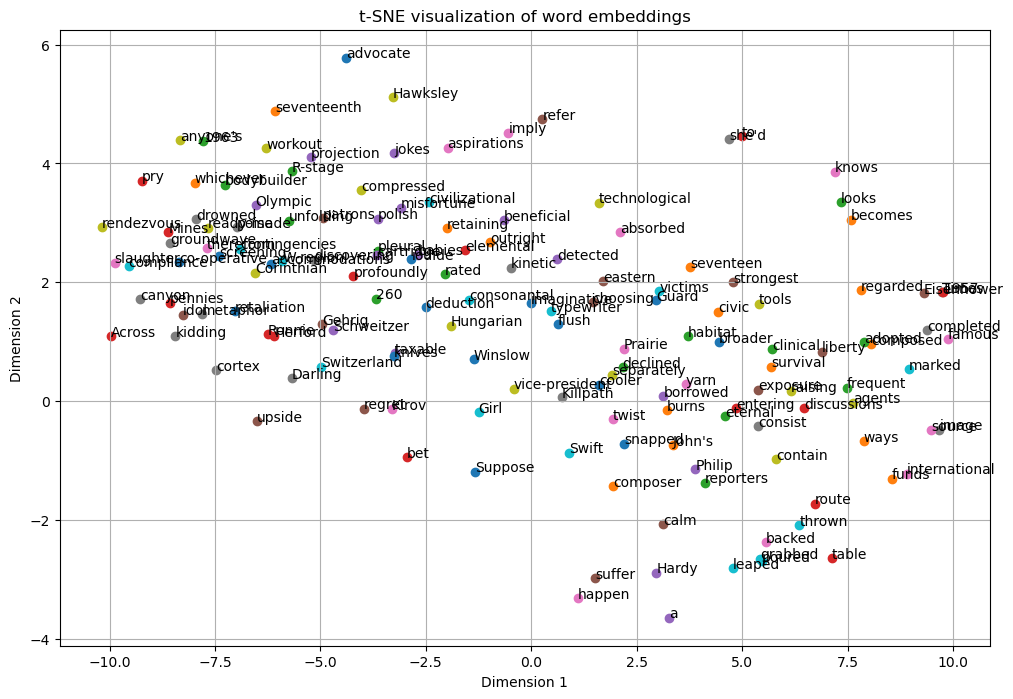

In [76]:
from sklearn.manifold import TSNE
import random

# Get the word embeddings
words = list(model.wv.index_to_key)  # List of words in the model's vocabulary
words = random.sample(words, int(len(words) * 0.01))

embeddings = np.array([model.wv[word] for word in words])

# Apply t-SNE to reduce the dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE visualization of word embeddings')
plt.grid(True)
plt.show()

### Pretrained models

In [99]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

In [36]:
glove_vectors.most_similar('twitter')

[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

In [37]:
glove_vectors.most_similar('book')

[('books', 0.94181889295578),
 ('project', 0.9214614033699036),
 ('review', 0.9140495657920837),
 ('script', 0.9069417119026184),
 ('new', 0.9069172143936157),
 ('feature', 0.8995184302330017),
 ('guest', 0.897861659526825),
 ('read', 0.8931056261062622),
 ('post', 0.8916701674461365),
 ('art', 0.8880472183227539)]

In [77]:
len(glove_vectors["book"])

25

## word2vec from scratch

Now we will write word2vec from scratch. Note that the purpose of this implementation is to help understand the theory behind word2vec. The implementation is not meant to be efficient so the running time is quite slow compared to the Gensim implementation. However, the code is simpler and shows the main ingredients of word2vec.

Different objectives can be used for word2vec. 

Sure! The optimization objective of Word2Vec can be written differently depending on whether you are using the Continuous Bag of Words (CBOW) model or the Skip-gram model. Here, I'll provide the formulas for both models, including the use of negative sampling to make the optimization more efficient.

### Skip-gram Model with Negative Sampling

In the Skip-gram model, the objective is to predict the context words given a target word. With negative sampling, the objective function can be written as:

$$
L = \sum_{t=1}^{T} \sum_{c \in C_t} \left[ \log \sigma (\mathbf{v}_{w_c} \cdot \mathbf{v}_{w_t}) + \sum_{n=1}^{k} \mathbb{E}_{w_n \sim P_n(w)} \log \sigma (-\mathbf{v}_{w_n} \cdot \mathbf{v}_{w_t}) \right]
$$

Where:
- $ T $ is the number of words in the corpus.
- $ C_t $ is the context window around the target word $ w_t $.
- $ \mathbf{v}_{w_t} $ is the vector representation of the target word $ w_t $.
- $ \mathbf{v}_{w_c} $ is the vector representation of the context word $ w_c $.
- $ \sigma $ is the sigmoid function, defined as $ \sigma(x) = \frac{1}{1 + e^{-x}} $.
- $ k $ is the number of negative samples.
- $ w_n $ are the negative samples drawn from the noise distribution $ P_n(w) $.

### Continuous Bag of Words (CBOW) Model with Negative Sampling

In the CBOW model, the objective is to predict the target word given the context words. With negative sampling, the objective function can be written as:

$$
L = \sum_{t=1}^{T} \left[ \log \sigma (\mathbf{v}_{w_t} \cdot \sum_{c \in C_t} \mathbf{v}_{w_c}) + \sum_{n=1}^{k} \mathbb{E}_{w_n \sim P_n(w)} \log \sigma (-\mathbf{v}_{w_n} \cdot \sum_{c \in C_t} \mathbf{v}_{w_c}) \right]
$$

Where:
- $ T $ is the number of words in the corpus.
- $ C_t $ is the context window around the target word $ w_t $.
- $ \mathbf{v}_{w_t} $ is the vector representation of the target word $ w_t $.
- $ \mathbf{v}_{w_c} $ is the vector representation of the context word $ w_c $.
- $ \sigma $ is the sigmoid function, defined as $ \sigma(x) = \frac{1}{1 + e^{-x}} $.
- $ k $ is the number of negative samples.
- $ w_n $ are the negative samples drawn from the noise distribution $ P_n(w) $.

### Explanation

- **Skip-gram Model**:
  - The first term $ \log \sigma (\mathbf{v}_{w_c} \cdot \mathbf{v}_{w_t}) $ measures the probability of the context word $ w_c $ given the target word $ w_t $.
  - The second term $ \sum_{n=1}^{k} \mathbb{E}_{w_n \sim P_n(w)} \log \sigma (-\mathbf{v}_{w_n} \cdot \mathbf{v}_{w_t}) $ measures the probability of negative samples $ w_n $ not being predicted given the target word $ w_t $.

- **CBOW Model**:
  - The first term $ \log \sigma (\mathbf{v}_{w_t} \cdot \sum_{c \in C_t} \mathbf{v}_{w_c}) $ measures the probability of the target word $ w_t $ given the sum of the context word vectors.
  - The second term $ \sum_{n=1}^{k} \mathbb{E}_{w_n \sim P_n(w)} \log \sigma (-\mathbf{v}_{w_n} \cdot \sum_{c \in C_t} \mathbf{v}_{w_c}) $ measures the probability of negative samples $ w_n $ not being predicted given the sum of the context word vectors.

Both objective functions are optimized using stochastic gradient descent (SGD) or other optimization techniques, with negative sampling used to approximate the softmax function and make the computation more efficient.

In [78]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))  

In [79]:
def build_indices(sents):
    """ 
  
    Parameters: 
    sents: A list of sentecens and each sentence is a list of words (i.e., a list of lists). 
  
    Returns: 
    word_freqs: frequency of each word
    word_to_index: a mapping from word names to integers.
    index_to_word: a mapping from integers to word names.
    
  
    """
    counter = 0
    word_freqs = {}
    word_to_index = {}
    index_to_word = {}
    for i in range(len(sents)): 
        for j in range(len(sents[i])):
            w = sents[i][j].lower()
            if w in word_freqs:
                word_freqs[w] += 1
            else:
                word_freqs[w] = 1
                word_to_index[w] = counter
                index_to_word[counter] = w
                counter += 1
            
    return word_freqs, word_to_index, index_to_word

In [80]:
def build_training_set(sents, word_freqs, window=5, sampling_freq = 0.001, neg_exp = 0.75, num_negs = 5, min_count=5):
    """ 
    Builds a trainig set
    
    Parameters: 
    sents: A list of sentences and each sentence is a list of words (i.e., a list of lists).
    word_freqs: Frequency of words.
    windows: size of the context window.
    sampling_freq: words whose frequency larger than this value will be discarded.
    neg_exp: used for adjusting the negative sampling distribution.
    min_count: 
  
    Returns: 
    training_set: list of context word, positive and negatives
    """
    words_list = []
    total_freq = sum(word_freqs.values())
    
    #total_freq = sum([freq**(neg_exp) for freq in word_freqs.values()])
    # word_array will be used for sampling negatives
    word_array = []
    for word, freq in word_freqs.items():
        if ((word_freqs[word]/total_freq) < sampling_freq) and (word_freqs[word] > min_count):
            words_list.append(word)
            for i in range(int(freq**neg_exp)):
                word_array.append(word)
    
    training_set = []
    
    sampled_sents = []
    for i in range(len(sents)): 
        sent = []
        for j in range(len(sents[i])):
            w = sents[i][j].lower()
            if ((word_freqs[w] / total_freq) < sampling_freq) and (word_freqs[w] > min_count):
                sent.append(w)
        sampled_sents.append(sent)
    
    
    for i in tqdm(range(len(sampled_sents))): 
        for j, w in enumerate(sampled_sents[i]):
            context = []
            for k in range(max(j-window,0),min(j+window+1,len(sampled_sents[i]))):
                w_p = sampled_sents[i][k]
                if (w == w_p):
                    continue
                w_n = []
                for k in range(num_negs):
                    w_n.append(word_array[np.random.randint(0,len(word_array))] )
                training_set.append([w,w_p,w_n])

    return training_set, np.unique(words_list)

In order to understand the produced training_set here is a very simple example sentence consisting of 6 words.

In [81]:
sents = [["a","b","c","d","e","f"]]
word_freqs = {"a":1,"b":1,"c":1,"d":1,"e":1,"f":1}


In [82]:
training_set = build_training_set(sents, window=1, word_freqs= word_freqs , sampling_freq = 1, min_count= 0, num_negs = 1)

100%|██████████| 1/1 [00:00<00:00, 1586.95it/s]


In [83]:
# print training set
training_set

([['a', 'b', ['d']],
  ['b', 'a', ['c']],
  ['b', 'c', ['e']],
  ['c', 'b', ['f']],
  ['c', 'd', ['c']],
  ['d', 'c', ['c']],
  ['d', 'e', ['a']],
  ['e', 'd', ['a']],
  ['e', 'f', ['e']],
  ['f', 'e', ['a']]],
 array(['a', 'b', 'c', 'd', 'e', 'f'], dtype='<U1'))

Let us now build the training set for the brown dataset which will take some time

In [84]:
def preprocess_brown_corpus():
    processed_sentences = []
    for sentence in brown.sents():
        processed_sentence = simple_preprocess(' '.join(sentence), deacc=True)  
        processed_sentences.append(processed_sentence)
    return processed_sentences


In [85]:
sents = preprocess_brown_corpus()

In [86]:
word_freqs, word_to_index, index_to_word = build_indices(sents)

In [87]:
training_set, words_list = build_training_set(sents, word_freqs, window=5, sampling_freq = 0.001, neg_exp = 0.75, num_negs = 5, min_count=5)

100%|██████████| 57340/57340 [01:12<00:00, 792.77it/s] 


In [89]:
# print first 10 examples in the trainigng set
training_set[:10]

[['fulton',
  'county',
  ['material', 'enough', 'own', 'characteristics', 'yellow']],
 ['fulton', 'grand', ['theirs', 'sue', 'your', 'scene', 'crombie']],
 ['fulton', 'jury', ['came', 'budget', 'ultimately', 'why', 'free']],
 ['fulton', 'friday', ['errors', 'year', 'ground', 'beings', 'norberg']],
 ['fulton', 'investigation', ['faculty', 'find', 'used', 'cm', 'newspaper']],
 ['county', 'fulton', ['craft', 'years', 'sum', 'sense', 'simplified']],
 ['county',
  'grand',
  ['twins', 'accomplish', 'superintendent', 'simple', 'celestial']],
 ['county', 'jury', ['vote', 'those', 'alabama', 'animal', 'service']],
 ['county', 'friday', ['treatment', 'hot', 'method', 'life', 'leap']],
 ['county',
  'investigation',
  ['destroy', 'caution', 'snakes', 'modern', 'closest']]]

In [90]:
len(training_set)

3194890

In [91]:
def build_model(training_set, initial_alpha = 0.025, min_alpha = 0.0001, n_iters = 5, my_lambda = 0, vector_size = 30):
    word_vectors = {}
    
    # initialize word vectors
    for n in range(len(words_list)):
        word_vectors[words_list[n]] = np.random.rand(vector_size,1) - 0.5
    

    alpha = initial_alpha
    for t in range(n_iters):
        training_set = shuffle(training_set)
        objective = 0
        print("cosine of words 'friend' and 'fellow': ",np.dot(word_vectors['friend'].T, word_vectors['fellow']))
        for ex in tqdm(training_set):
            w = ex[0]
            w_p = ex[1]
            w_n_list = ex[2]
            w_v = word_vectors[w]
            w_p_v = word_vectors[w_p]
            word_vectors[w_p] = w_p_v + alpha*(((1-sigmoid(np.dot(w_v.T,w_p_v)))*w_v)-my_lambda*w_p_v)
            objective += np.log((sigmoid(np.dot(w_v.T,w_p_v))))

            for n in range(len(w_n_list)):
                w_n = w_n_list[n]
                w_n_v = word_vectors[w_n]
                word_vectors[w_n] = w_n_v + alpha*((-(1-sigmoid(-np.dot(w_v.T,w_n_v)))*w_v)-my_lambda*w_n_v)      
                objective += np.log((sigmoid(-np.dot(w_v.T,w_p_v))))
     
        alpha = initial_alpha - ((initial_alpha - min_alpha) * t / n_iters)
        print("alpha: ",alpha)
        print("Iteration: ", t)
        print("Objective: ", objective)
    print("cosine of words 'friend' and 'fellow': ",np.dot(word_vectors['friend'].T, word_vectors['fellow']))

    return word_vectors

In [92]:
word_vectors = build_model(training_set, initial_alpha = 0.025, min_alpha = 0.0001, n_iters = 5, my_lambda = 0, vector_size = 30)

cosine of words 'friend' and 'fellow':  [[0.54894748]]


 35%|███▍      | 1108259/3194890 [04:04<07:40, 4532.65it/s]


KeyboardInterrupt: 

In [24]:
print("cosine of words 'friend' and 'fellow': ",np.dot(word_vectors['friend'].T, word_vectors['fellow']))


cosine of words 'friend' and 'fellow':  [[0.42688752]]


In [25]:
def most_similar(word, word_vectors):
    pq = PriorityQueue()
    for w in word_vectors.keys():
        pq.put((-np.dot(word_vectors[word].T, word_vectors[w]), w))
    return pq

In [26]:
pq = most_similar('book', word_vectors)

In [27]:
for i in range(10):
    print(pq.get())

(array([[-1.03779986]]), 'book')
(array([[-0.88580655]]), 'longing')
(array([[-0.88050201]]), 'artificially')
(array([[-0.87788119]]), 'writing')
(array([[-0.82542975]]), 'weakened')
(array([[-0.80402205]]), 'century')
(array([[-0.80135733]]), 'catholics')
(array([[-0.7936056]]), 'nominated')
(array([[-0.77861349]]), 'solo')
(array([[-0.77809296]]), 'quiney')


In [ ]:
vec("king")-vec("man")+vec("women") = vec("queen")

In [28]:
pq = most_similar('eight', word_vectors)
for i in range(10):
    print(pq.get())

(array([[-1.25496278]]), 'eight')
(array([[-1.10124357]]), 'winslow')
(array([[-0.94148858]]), 'physicians')
(array([[-0.91491901]]), 'francisco')
(array([[-0.9076168]]), 'thirty')
(array([[-0.90180381]]), 'twenty')
(array([[-0.89428036]]), 'convertible')
(array([[-0.88915806]]), 'revive')
(array([[-0.87207081]]), 'fiscal')
(array([[-0.87036548]]), 'licenses')


### Questions and Disussions
- In what ways word2vec method is better than building a co-occurrence matrix?
- The speed difference between Gensim and Python implementation of word2vec above is huge. Gensim word2vec took  about 15 seconds whereas the python code took about 35 minutes (5 epocs). Since Gensim code uses optimized C routines this difference is expcted. For more details about this speed difference see [this link](https://github.com/tevfikaytekin/data_science/blob/master/data_science/python_speed.ipynb).
- Gensim word2vec results also are better, what can we do to improve the Python code.
